In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt, mpld3
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
from typing import Optional, Dict, Any, List
from ciso8601 import parse_datetime
from requests import Request, Session, Response
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib.animation import FuncAnimation
from mpld3 import plugins

In [2]:
url = engine()
data = url.getData()
df = data
df

,time,open,high,low,close,volume
0,2021-10-14 21:59:00,57756.0,57769.0,57756.0,57769.0,7006.1261
1,2021-10-14 22:00:00,57769.0,57781.0,57760.0,57760.0,107135.9445
2,2021-10-14 22:01:00,57760.0,57760.0,57736.0,57736.0,17047.5442
3,2021-10-14 22:02:00,57736.0,57736.0,57728.0,57729.0,18415.7846
4,2021-10-14 22:03:00,57729.0,57729.0,57700.0,57705.0,500928.3951
...,...,...,...,...,...,...
1495,2021-10-15 22:54:00,61316.0,61371.0,61292.0,61370.0,435431.3879
1496,2021-10-15 22:55:00,61370.0,61394.0,61356.0,61376.0,361115.6907
1497,2021-10-15 22:56:00,61376.0,61377.0,61352.0,61361.0,428046.1675
1498,2021-10-15 22:57:00,61361.0,61361.0,61282.0,61293.0,421181.5502


In [3]:
df

,time,open,high,low,close,volume
0,2021-10-14 21:59:00,57756.0,57769.0,57756.0,57769.0,7006.1261
1,2021-10-14 22:00:00,57769.0,57781.0,57760.0,57760.0,107135.9445
2,2021-10-14 22:01:00,57760.0,57760.0,57736.0,57736.0,17047.5442
3,2021-10-14 22:02:00,57736.0,57736.0,57728.0,57729.0,18415.7846
4,2021-10-14 22:03:00,57729.0,57729.0,57700.0,57705.0,500928.3951
...,...,...,...,...,...,...
1495,2021-10-15 22:54:00,61316.0,61371.0,61292.0,61370.0,435431.3879
1496,2021-10-15 22:55:00,61370.0,61394.0,61356.0,61376.0,361115.6907
1497,2021-10-15 22:56:00,61376.0,61377.0,61352.0,61361.0,428046.1675
1498,2021-10-15 22:57:00,61361.0,61361.0,61282.0,61293.0,421181.5502


In [4]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2

,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
66,2021-10-14 23:05:00,57475.0,57552.0,57475.0,57551.0,177950.6633,57594.777778,57594.142857,1.0,0.001304,-0.001287,0.0,57594.777778,0.999240,1.0,0.0,0.001304,-1.0
67,2021-10-14 23:06:00,57551.0,57630.0,57551.0,57630.0,104431.5501,57584.111111,57595.095238,-1.0,0.001372,-0.001304,-2.0,57584.111111,1.000797,1.0,0.0,0.001372,-1.0
68,2021-10-14 23:07:00,57629.0,57629.0,57590.0,57617.0,28324.0855,57581.333333,57597.238095,-1.0,-0.000226,-0.001372,0.0,57581.333333,1.000619,1.0,0.0,-0.000226,-1.0
69,2021-10-14 23:08:00,57617.0,57650.0,57608.0,57640.0,212396.4163,57577.777778,57598.285714,-1.0,0.000399,0.000226,0.0,57577.777778,1.001081,1.0,0.0,0.000399,-1.0
70,2021-10-14 23:09:00,57639.0,57649.0,57591.0,57592.0,335974.8785,57582.000000,57600.952381,-1.0,-0.000833,-0.000399,0.0,57582.000000,1.000174,1.0,0.0,-0.000833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-10-15 22:54:00,61316.0,61371.0,61292.0,61370.0,435431.3879,61378.666667,61372.000000,1.0,0.000880,0.000228,0.0,61378.666667,0.999859,1.0,0.0,0.000880,-1.0
1496,2021-10-15 22:55:00,61370.0,61394.0,61356.0,61376.0,361115.6907,61372.888889,61371.095238,1.0,0.000098,0.000880,0.0,61372.888889,1.000051,1.0,0.0,0.000098,1.0
1497,2021-10-15 22:56:00,61376.0,61377.0,61352.0,61361.0,428046.1675,61370.222222,61371.571429,-1.0,-0.000244,-0.000098,-2.0,61370.222222,0.999850,1.0,0.0,-0.000244,1.0
1498,2021-10-15 22:57:00,61361.0,61361.0,61282.0,61293.0,421181.5502,61361.777778,61369.761905,-1.0,-0.001109,0.000244,0.0,61361.777778,0.998879,1.0,0.0,-0.001109,1.0


## Trend positions

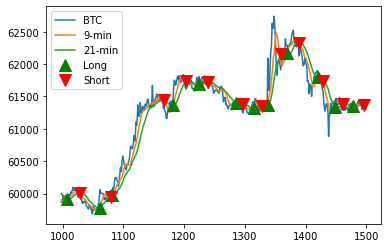

In [5]:
fig, ax = plt.subplots()
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
        color = "g", markersize = 12, label= "Long")
plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
        color = "r", markersize = 12, label="Short")
plt.legend(loc=2);
plt.savefig('../web/assets/trendPositions.png')

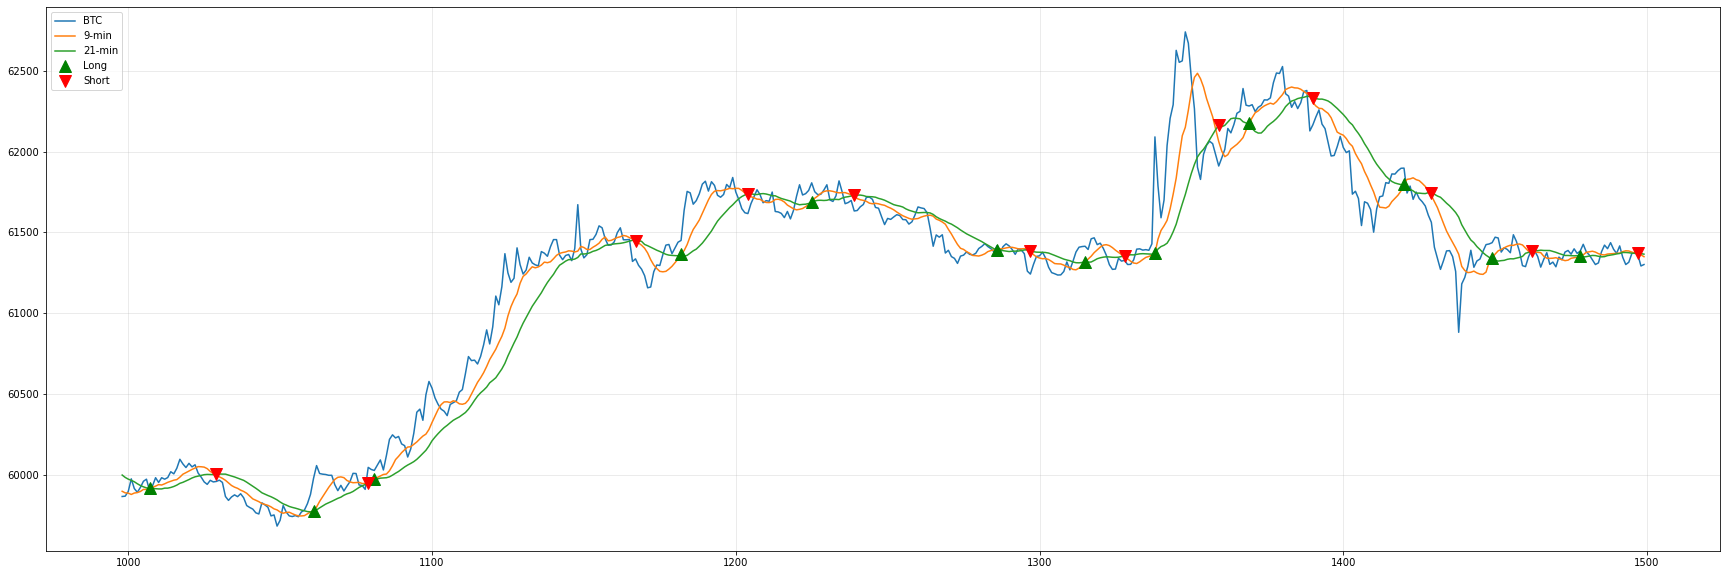

In [6]:
t = Algo.plot_positionT(df2)
t

# Trend Algo Performance

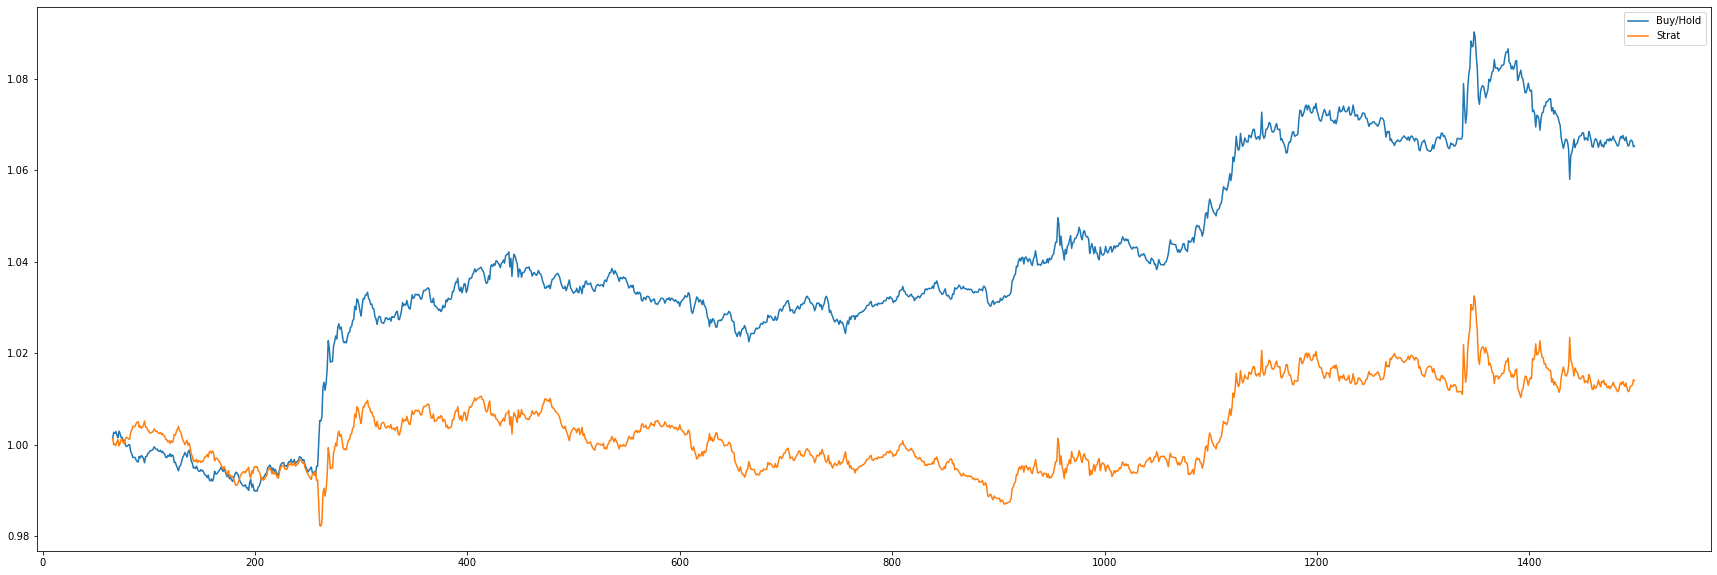

In [7]:
df2['trend_returns'] = df2.signal * df2.market_returns
plt.plot(np.exp(df2.market_returns).cumprod(),label = "Buy/Hold")
plt.plot(np.exp(df2.trend_returns).cumprod(),label = "Strat")
plt.legend()
plt.savefig('../web/assets/trendRets.png')

In [8]:
trendRets = Algo.trend_gainz(df2)
trendRets

Market Returns:  1.0653234928067423
Trend Strategy Returns:  1.014017780590752


# Range positions

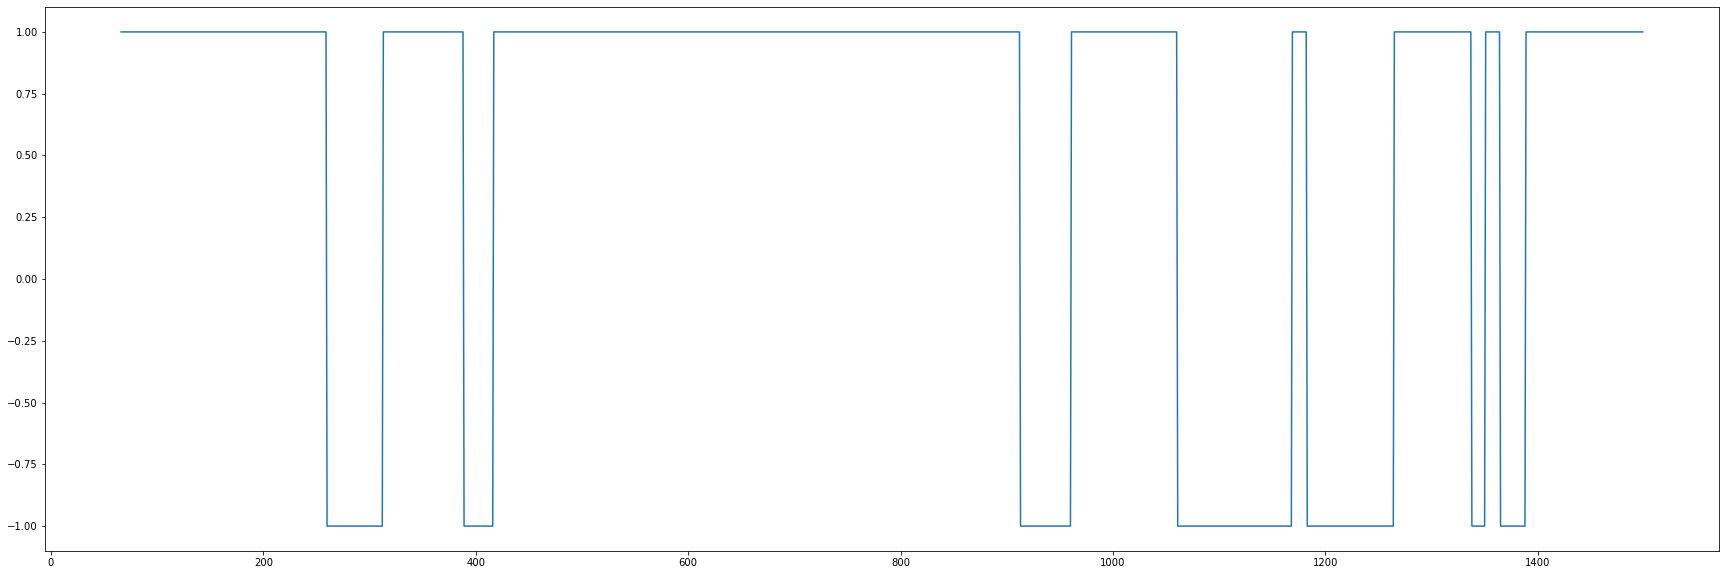

In [9]:
df2.position.dropna().plot()
plt.savefig('../web/assets/rangeStatus.png')


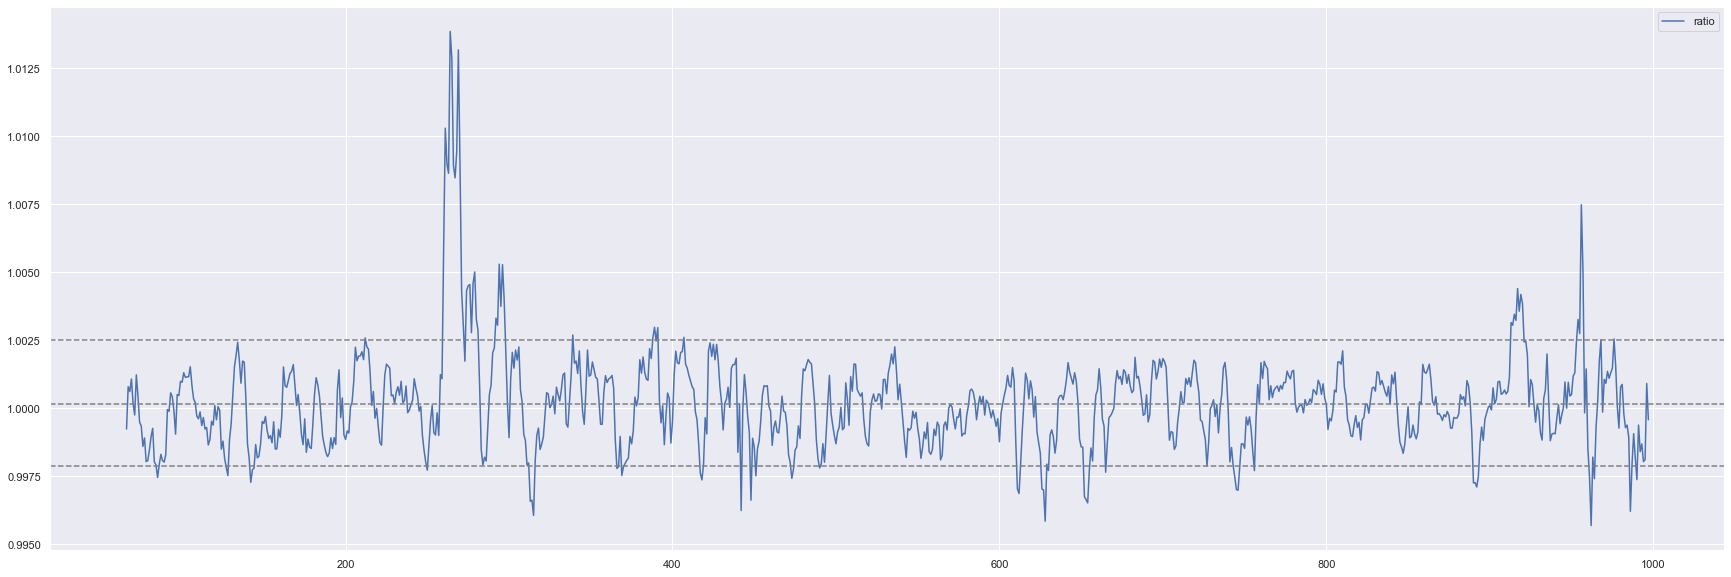

In [10]:
p = Algo.plot_percentiles(df2.head(-500))
p

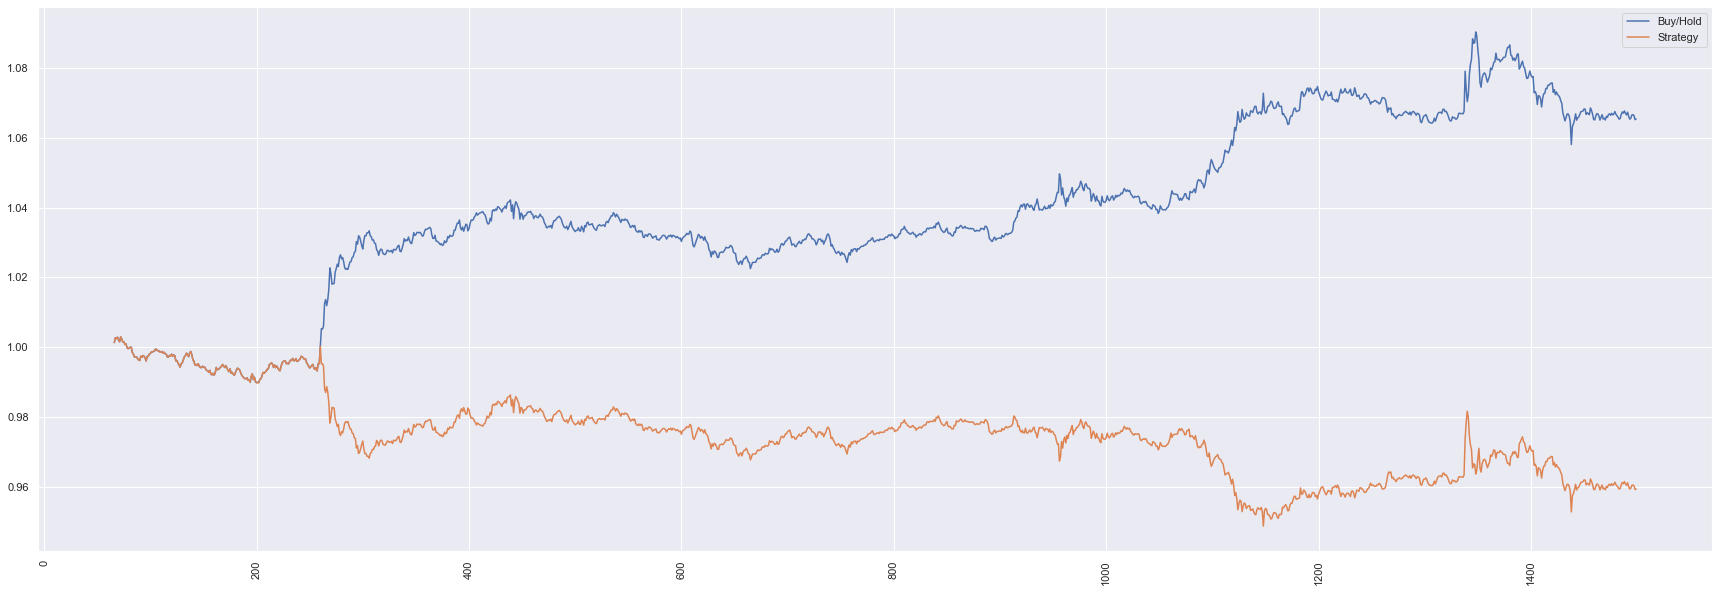

In [11]:
    """ Plots returns for the range algo df thus returns 'R' """
    plt.plot(np.exp(df2['market_returns'].dropna()).cumprod(), label='Buy/Hold')
    plt.plot(np.exp(df2['range_returns'].dropna()).cumprod(), label='Strategy')
    plt.xticks(rotation=90)
    plt.legend();
    plt.savefig('../web/assets/rangeRets.png')

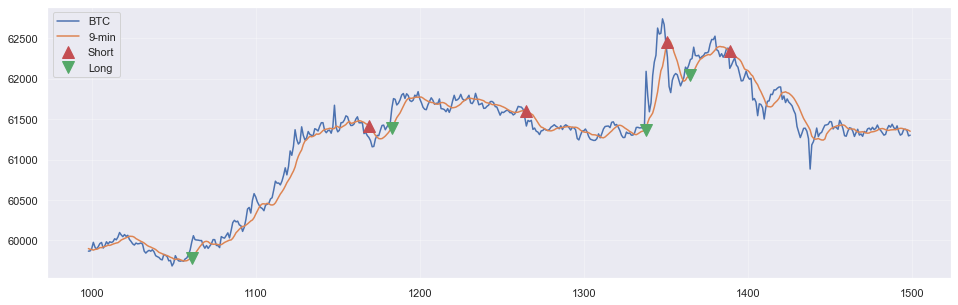

In [12]:
plt.rcParams['figure.figsize'] = 16.2, 5
plt.grid(True, alpha = .3)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);
plt.savefig('../web/assets/dualPlot.png')


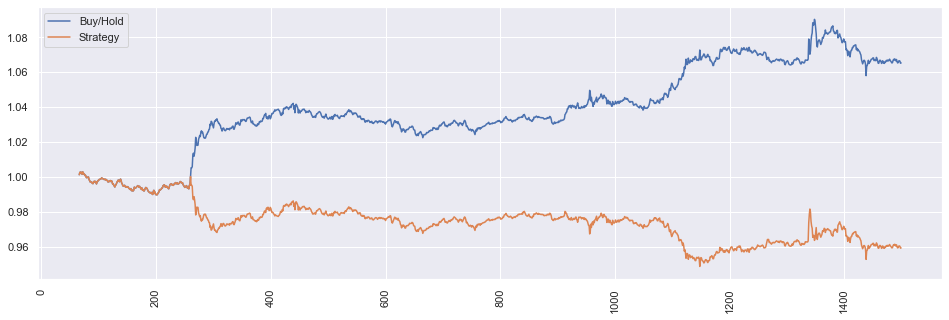

In [13]:
rangeRet = Algo.market_returnsR(df2)
rangeRet

In [14]:
rangeRets = Algo.range_gainz(df2)
rangeRets

Market Returns:  1.0653234928067423
Range Strategy Returns:  0.9593345818644414


In [15]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

,time,close,market_returns,range_returns,trend_returns
66,2021-10-14 23:05:00,57551.0,0.001304,0.001304,0.001304
67,2021-10-14 23:06:00,57630.0,0.001372,0.001372,-0.001372
68,2021-10-14 23:07:00,57617.0,-0.000226,-0.000226,0.000226
69,2021-10-14 23:08:00,57640.0,0.000399,0.000399,-0.000399
70,2021-10-14 23:09:00,57592.0,-0.000833,-0.000833,0.000833
71,2021-10-14 23:10:00,57564.0,-0.000486,-0.000486,0.000486
72,2021-10-14 23:11:00,57645.0,0.001406,0.001406,-0.001406
73,2021-10-14 23:12:00,57610.0,-0.000607,-0.000607,0.000607
74,2021-10-14 23:13:00,57562.0,-0.000834,-0.000834,0.000834
75,2021-10-14 23:14:00,57564.0,0.000035,0.000035,-0.000035


In [16]:
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] > bestFit['trend_returns'],
#                                             bestFit['range_returns'], np.nan)
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] < bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] == bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# # bestFit['20m_maxVal'] = bestFit['minuteTF_maxVal'].shift(-20)
# fitList =  bestFit['minuteTF_maxVal'].shift(-20)


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [17]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


array([['time', '-0.00022560240275559806', 'rangeRet', ...,
        '0.00022560240275559806', '1.0', '0.00022560240275559806'],
       ['time', '-0.00048629685907464193', 'rangeRet', ...,
        '0.00048629685907464193', '1.0', '0.00048629685907464193'],
       ['time', '-0.0008335359771312056', 'rangeRet', ...,
        '0.0008335359771312056', '1.0', '0.0008335359771312056'],
       ...,
       ['time', '0.0007492589202851008', 'rangeRet', ...,
        '0.0007492589202851008', '0.0', '0.0007492589202851008'],
       ['time', '0.00022835146651800642', 'rangeRet', ...,
        '0.00022835146651800642', '0.0', '0.00022835146651800642'],
       ['time', '-0.00024442507271160707', 'rangeRet', ...,
        '0.00024442507271160707', '1.0', '0.00024442507271160707']],
      dtype='<U32')

In [18]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

,time,market_returns,rangeRet,trendRet,winningAlgo,winnersRets,addTrend,addRange,result
0,time,-0.00022560240275559806,-0.00022560240275559806,0.00022560240275559806,1.0,0.00022560240275559806,0.00048629685907464193,-0.00048629685907464193,0.00048629685907464193
1,time,-0.00048629685907464193,-0.00048629685907464193,0.00048629685907464193,1.0,0.00048629685907464193,0.0008335359771312056,-0.0008335359771312056,0.0008335359771312056
2,time,-0.0008335359771312056,-0.0008335359771312056,0.0008335359771312056,1.0,0.0008335359771312056,-0.00010430247727910569,0.00010430247727910569,-0.00010430247727910569
3,time,0.00010430247727910569,0.00010430247727910569,-0.00010430247727910569,-1.0,0.00010430247727910569,-0.00012183553957711979,0.00012183553957711979,0.00012183553957711979
4,time,0.00012183553957711979,0.00012183553957711979,-0.00012183553957711979,-1.0,0.00012183553957711979,0.001497475467017395,-0.001497475467017395,-0.001497475467017395
...,...,...,...,...,...,...,...,...,...
470,time,0.0011084668431937672,0.0011084668431937672,0.0011084668431937672,0.0,0.0011084668431937672,0.0006024243691875597,0.0006024243691875597,0.0006024243691875597
471,time,0.0006024243691875597,0.0006024243691875597,0.0006024243691875597,0.0,0.0006024243691875597,0.0007492589202851008,0.0007492589202851008,0.0007492589202851008
472,time,0.0007492589202851008,0.0007492589202851008,0.0007492589202851008,0.0,0.0007492589202851008,0.00022835146651800642,0.00022835146651800642,0.00022835146651800642
473,time,0.00022835146651800642,0.00022835146651800642,0.00022835146651800642,0.0,0.00022835146651800642,0.00024442507271160707,-0.00024442507271160707,-0.00024442507271160707


In [19]:
df3.set_index('rangeRet')
df4 = df3.iloc[:-1 , :]
print(f' Dual Algo Returns over dataset 1minBTC: ', df3['result'].astype('float64').sum())
print(f'Market Buy/Hold Returns for same period: ', np.exp(bestFit.market_returns).astype('float64').cumprod().iloc[-1])
# when i try to sum it concatenates elements as strings, failed to convert to integer val
# also y output col have values that dont seem to be in range with the other values?

 Dual Algo Returns over dataset 1minBTC:  0.002209787277440256
Market Buy/Hold Returns for same period:  1.0653234928067423


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

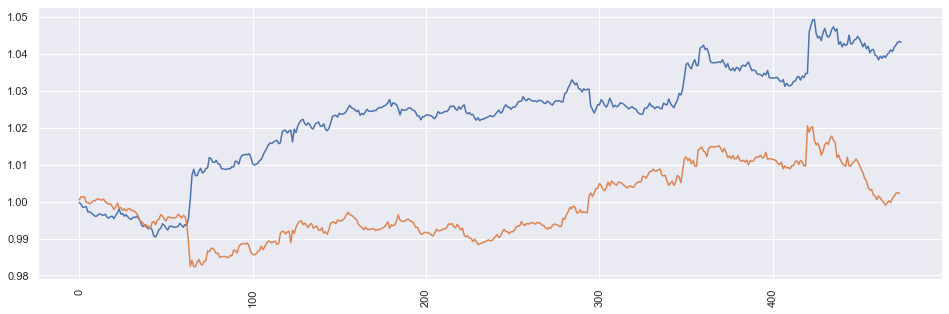

In [20]:
plt.plot(np.exp(df3['market_returns'].dropna().astype('float64')).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df3['result'].dropna().astype('float64')).cumprod(), label='Strategy')
plt.xticks(rotation=90)

In [21]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
portfolio

,BTC-PERP,holdings,cash,total,returns,time
66,115102.0,115102.0,100000.0,215102.0,NaN,2021-10-14 23:05:00
67,115260.0,115260.0,100000.0,215260.0,0.000735,2021-10-14 23:06:00
68,115234.0,115234.0,100000.0,215234.0,-0.000121,2021-10-14 23:07:00
69,115280.0,115280.0,100000.0,215280.0,0.000214,2021-10-14 23:08:00
70,115184.0,115184.0,100000.0,215184.0,-0.000446,2021-10-14 23:09:00
...,...,...,...,...,...,...
1495,122740.0,122740.0,87600.0,210340.0,0.000514,2021-10-15 22:54:00
1496,122752.0,122752.0,87600.0,210352.0,0.000057,2021-10-15 22:55:00
1497,122722.0,122722.0,87600.0,210322.0,-0.000143,2021-10-15 22:56:00
1498,122586.0,122586.0,87600.0,210186.0,-0.000647,2021-10-15 22:57:00
